In [3]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import functions
import re
from collections import Counter
import matplotlib.pyplot as plt
import urlextract
import emoji
from wordcloud import WordCloud
%matplotlib inline

In [4]:
file = open('WhatsApp Chat with GDSC KIIT Alumni Network.txt','r',encoding='utf-8')

In [5]:
def generateDataFrame(file):
    data = file.read()
    data = data.replace('\u202f', ' ')
    data = data.replace('\n', ' ')
    dt_format = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s?(?:AM\s|PM\s|am\s|pm\s)?-\s'
    # print(data)
    msgs = re.split(dt_format, data)[1:]
    # print(msgs)
    date_times = re.findall(dt_format, data)
    date = []
    time = []
    for dt in date_times:
        date.append(re.search('\d{1,2}/\d{1,2}/\d{2,4}', dt).group())
        time.append(re.search('\d{1,2}:\d{2}\s?(?:AM|PM|am|pm)?', dt).group())
    users = []
    message = []
    for m in msgs:
        s = re.split('([\w\W]+?):\s', m)
        if (len(s) < 3):
            users.append("Notifications")
            message.append(s[0])
        else:
            users.append(s[1])
            message.append(s[2])
    df = pd.DataFrame(list(zip(date, time, users, message)), columns=["Date", "Time(U)", "User", "Message"])
    return df

In [6]:
df = generateDataFrame(file)

In [7]:
df.head()

,Date,Time(U),User,Message
0,6/6/22,9:16 PM,Notifications,Messages and calls are end-to-end encrypted. N...
1,9/14/20,8:14 PM,Notifications,"~ Praddyum created group ""DSC KIIT Alumni Netw..."
2,6/6/22,9:16 PM,Notifications,You joined using this group's invite link
3,6/6/22,9:16 PM,Notifications,+91 87072 17791 joined using this group's invi...
4,6/6/22,9:18 PM,Notifications,+91 70776 30863 joined using this group's invi...


In [8]:
df.shape

(438, 4)

In [9]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False)
df['Time'] = pd.to_datetime(df['Time(U)']).dt.time
df['year'] = df['Date'].apply(lambda x: int(str(x)[:4]))
df['month'] = df['Date'].apply(lambda x: int(str(x)[5:7]))
df['date'] = df['Date'].apply(lambda x: int(str(x)[8:10]))
df['day'] = df['Date'].apply(lambda x: x.day_name())
df['hour'] = df['Time'].apply(lambda x: int(str(x)[:2]))
df['month_name'] = df['Date'].apply(lambda x: x.month_name())

C:\Users\Aakash\AppData\Local\Temp\ipykernel_9128\2410288521.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=False)
C:\Users\Aakash\AppData\Local\Temp\ipykernel_9128\2410288521.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time(U)']).dt.time


In [10]:
df.head()

,Date,Time(U),User,Message,Time,year,month,date,day,hour,month_name
0,2022-06-06,9:16 PM,Notifications,Messages and calls are end-to-end encrypted. N...,21:16:00,2022,6,6,Monday,21,June
1,2020-09-14,8:14 PM,Notifications,"~ Praddyum created group ""DSC KIIT Alumni Netw...",20:14:00,2020,9,14,Monday,20,September
2,2022-06-06,9:16 PM,Notifications,You joined using this group's invite link,21:16:00,2022,6,6,Monday,21,June
3,2022-06-06,9:16 PM,Notifications,+91 87072 17791 joined using this group's invi...,21:16:00,2022,6,6,Monday,21,June
4,2022-06-06,9:18 PM,Notifications,+91 70776 30863 joined using this group's invi...,21:18:00,2022,6,6,Monday,21,June


In [11]:
def getStats(df):
    media = df[df['Message'] == "<Media omitted> "]
    media_cnt = media.shape[0]
    df.drop(media.index, inplace=True)
    deleted_msgs = df[df['Message'] == "This message was deleted "]
    deleted_msgs_cnt = deleted_msgs.shape[0]
    df.drop(deleted_msgs.index, inplace=True)
    temp = df[df['User'] == 'Notifications']
    df.drop(temp.index, inplace=True)
    print("h4")
    extractor = urlextract.URLExtract()
    print("h3")
    links = []
    for msg in df['Message']:
        x = extractor.find_urls(msg)
        if x:
            links.extend(x)
    links_cnt = len(links)
    word_list = []
    for msg in df['Message']:
        word_list.extend(msg.split())
    word_count = len(word_list)
    msg_count = df.shape[0]
    return df, media_cnt, deleted_msgs_cnt, links_cnt, word_count, msg_count

In [12]:
df, media_cnt, deleted_msgs_cnt, links_cnt, word_count, msg_count = functions.getStats(df)

In [13]:
print(media_cnt, deleted_msgs_cnt, links_cnt, word_count, msg_count)

22 0 22 2400 315


2024-03-18 13:12:55.250 
  command:

    streamlit run C:\Users\Aakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


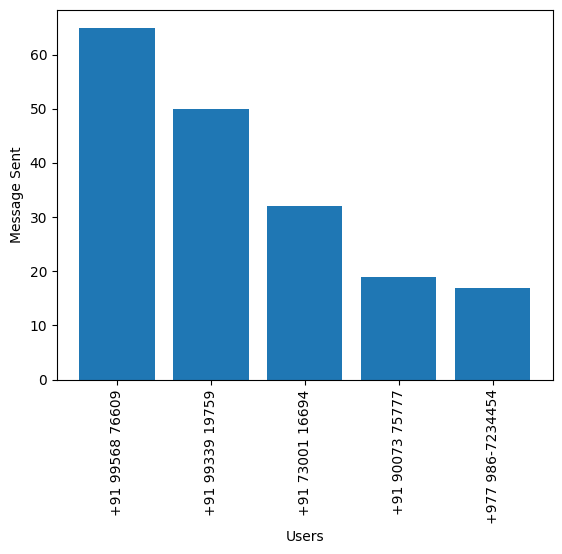

In [14]:
                x = df['User'].value_counts().head()    # counts the occurence of the each user
                name = x.index         #name of the user
                count = x.values       #number of message
                st.title("Messaging Frequency")
                st.subheader('Messaging Percentage Count of Users')
                col1, col2 = st.columns(2)
                with col1:
                    st.dataframe(round((df['User'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(
                    columns={'User': 'name', 'count': 'percent'}))
                with col2:
                    fig, ax = plt.subplots()
                    ax.bar(name, count)
                    ax.set_xlabel("Users")
                    ax.set_ylabel("Message Sent")
                    plt.xticks(rotation='vertical')
                    st.pyplot(fig)

In [15]:
counts = df['User'].value_counts().head()
plt.figure(figsize=(15, 7))
plt.bar(counts.index, counts.values)
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4],
 [Text(0, 0, '+91 99568 76609'),
  Text(1, 0, '+91 99339 19759'),
  Text(2, 0, '+91 73001 16694'),
  Text(3, 0, '+91 90073 75777'),
  Text(4, 0, '+977 986-7234454')])

In [16]:
def MostCommonWords(df):
    f = open('stop_hinglish.txt')
    stop_words = f.read()
    f.close()
    words = []
    for message in df['Message']:
        for word in message.lower().split():
            if word not in stop_words:
                words.append(word)
    return pd.DataFrame(Counter(words).most_common(20))

In [17]:
mostcommon = MostCommonWords(df)
mostcommon

,0,1
0,congratulations,16
1,kiit,11
2,congrats,10
3,make,8
4,tier,8
5,kaam,8
6,internship,7
7,meet,7
8,wordpress,7
9,campus,6


In [18]:
!pip install emoji

In [19]:
import emoji

In [20]:
def getEmoji(df):
    emojis = []
    for message in df['Message']:
        # checks for emojis in the messages using unicode
        emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
    return pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))


dfmoji = getEmoji(df)
dfmoji

,0,1
0,🥲,10
1,😂,10
2,🏻,7
3,🫠,7
4,🙂,5
5,🎉,5
6,🥳,4
7,😌,4
8,👏,3
9,🙌,3


In [21]:
def getMonthlyTimeline(df):

    df.columns = df.columns.str.strip()
    df = df.reset_index()
    # first group by year and then month and takes no. of messages
    timeline = df.groupby(['year', 'month']).count()['Message'].reset_index()
    time = []
    for i in range(timeline.shape[0]):
        # time list adds month and year along with the messages
        time.append(str(timeline['month'][i]) + "-" + str(timeline['year'][i]))
    timeline['time'] = time
    timeline
    return timeline

In [22]:
getMonthlyTimeline(df)

,year,month,Message,time
0,2022,6,22,6-2022
1,2022,7,40,7-2022
2,2022,8,58,8-2022
3,2022,9,21,9-2022
4,2022,11,21,11-2022
5,2023,1,3,1-2023
6,2023,2,34,2-2023
7,2023,3,9,3-2023
8,2023,4,4,4-2023
9,2023,7,82,7-2023


In [23]:
temp1 = df['day'].value_counts()
temp1

day
Thursday     96
Monday       71
Sunday       58
Friday       38
Tuesday      34
Wednesday    16
Saturday      2
Name: count, dtype: int64

In [24]:
temp2 = df['month'].value_counts()
temp2

month
7     122
8      65
2      48
6      22
9      21
11     21
3       9
4       4
1       3
Name: count, dtype: int64

In [25]:
temp = df.groupby(['year','month']).count()['Message'].reset_index()
temp

,year,month,Message
0,2022,6,22
1,2022,7,40
2,2022,8,58
3,2022,9,21
4,2022,11,21
5,2023,1,3
6,2023,2,34
7,2023,3,9
8,2023,4,4
9,2023,7,82


In [26]:
df.head()

,Date,Time(U),User,Message,Time,year,month,date,day,hour,month_name
33,2022-06-15,12:51 PM,+91 99568 76609,sunnen me aya ki Isbar leads ka farewell BLR ...,12:51:00,2022,6,15,Wednesday,12,June
34,2022-06-15,1:32 PM,+91 98749 48947,🌚,13:32:00,2022,6,15,Wednesday,13,June
35,2022-06-15,1:32 PM,+91 98749 48947,Nice,13:32:00,2022,6,15,Wednesday,13,June
36,2022-06-15,1:34 PM,+91 98749 48947,But mail mei toh virtual likha hua hai,13:34:00,2022,6,15,Wednesday,13,June
38,2022-06-15,1:38 PM,+91 93376 97412,wah🌟,13:38:00,2022,6,15,Wednesday,13,June
